In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('NVL-Historical-Data.csv')
df

,Unnamed: 0,Date,Price
0,0,2017-01-03,25055.00
1,1,2017-01-04,25225.00
2,2,2017-01-05,25097.00
3,3,2017-01-06,25140.00
4,4,2017-01-07,25129.25
...,...,...,...
2702,2702,2024-05-28,14500.00
2703,2703,2024-05-29,14150.00
2704,2704,2024-05-30,14150.00
2705,2705,2024-05-31,14450.00


In [3]:
df = df.reset_index()['Price']
df

0       25055.00
1       25225.00
2       25097.00
3       25140.00
4       25129.25
          ...   
2702    14500.00
2703    14150.00
2704    14150.00
2705    14450.00
2706    14350.00
Name: Price, Length: 2707, dtype: float64

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [5]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

In [6]:
#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

In [7]:
#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [8]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [10]:
def forecast_future_days(model, test_data, time_step, pred_days):
    x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
    temp_input = list(x_input[0].tolist())
    xgb_output = []

    for i in range(pred_days):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)

            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]

            xgb_output.extend(yhat.tolist())
        else:
            yhat = model.predict(x_input)
            print("{} day output {}".format(i, yhat))

            temp_input.extend(yhat.tolist())
            xgb_output.extend(yhat.tolist())

    return xgb_output

## 7:3 ratio

In [11]:
#Build model
model_7_3 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [12]:
model_7_3.fit(x_train_7_3, y_train_7_3, eval_set=[(x_test_7_3, y_test_7_3)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

array([0.8176074 , 0.80328465, 0.80328465, 0.80328465, 0.80328465,
       0.80585593, 0.80585593, 0.80328465, 0.8299891 , 0.8038699 ,
       0.80328465, 0.80328465, 0.80341   , 0.80328465, 0.80328465,
       0.80328465, 0.790492  , 0.790492  , 0.80328465, 0.80328465,
       0.80328465, 0.80328465, 0.790492  , 0.790492  , 0.790492  ,
       0.790492  , 0.790492  , 0.7913172 , 0.790492  , 0.7849514 ,
       0.7849514 , 0.80585593, 0.80328465, 0.80328465, 0.80328465,
       0.79774404, 0.7849514 , 0.79774404, 0.7849514 , 0.79774404,
       0.79774404, 0.79774404, 0.79774404, 0.79774404, 0.80328465,
       0.8103473 , 0.82709813, 0.8522801 , 0.8209505 , 0.81482464,
       0.8653656 , 0.8741999 , 0.86582553, 0.8725828 , 0.86626995,
       0.86626995, 0.86626995, 0.86626995, 0.86626995, 0.874519  ,
       0.86626995, 0.8735063 , 0.86626995, 0.86626995, 0.86626995,
       0.86626995, 0.86626995, 0.874519  , 0.874519  , 0.87270814,
       0.87270814, 0.86626995, 0.86626995, 0.86626995, 0.86626

In [14]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, time_step, 90)

0 day output [0.20253627]
1 day output [0.20884764]
2 day output [0.20895547]
3 day output [0.20895547]
4 day output [0.21300097]
5 day output [0.21300097]
6 day output [0.21300097]
7 day output [0.21300097]
8 day output [0.21300097]
9 day output [0.21300097]
10 day output [0.21300097]
11 day output [0.21300097]
12 day output [0.21300097]
13 day output [0.21300097]
14 day output [0.21300097]
15 day output [0.21300097]
16 day output [0.21300097]
17 day output [0.21300097]
18 day output [0.21300097]
19 day output [0.21300097]
20 day output [0.21300097]
21 day output [0.21300097]
22 day output [0.21300097]
23 day output [0.21300097]
24 day output [0.21300097]
25 day output [0.21300097]
26 day output [0.21300097]
27 day output [0.21300097]
28 day output [0.21300097]
29 day output [0.21300097]
0 day output [0.20253627]
1 day output [0.20884764]
2 day output [0.20895547]
3 day output [0.20895547]
4 day output [0.21300097]
5 day output [0.21300097]
6 day output [0.21300097]
7 day output [0.21

In [15]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[77388.65 ],
       [76212.516],
       [76212.516],
       [76212.516],
       [76212.516],
       [76423.664],
       [76423.664],
       [76212.516],
       [78405.38 ],
       [76260.58 ],
       [76212.516],
       [76212.516],
       [76222.81 ],
       [76212.516],
       [76212.516],
       [76212.516],
       [75162.04 ],
       [75162.04 ],
       [76212.516],
       [76212.516],
       [76212.516],
       [76212.516],
       [75162.04 ],
       [75162.04 ],
       [75162.04 ],
       [75162.04 ],
       [75162.04 ],
       [75229.805],
       [75162.04 ],
       [74707.06 ],
       [74707.06 ],
       [76423.664],
       [76212.516],
       [76212.516],
       [76212.516],
       [75757.55 ],
       [74707.06 ],
       [75757.55 ],
       [74707.06 ],
       [75757.55 ],
       [75757.55 ],
       [75757.55 ],
       [75757.55 ],
       [75757.55 ],
       [76212.516],
       [76792.48 ],
       [78167.984],
       [80235.83 ],
       [77663.17 ],
       [77160.14 ],


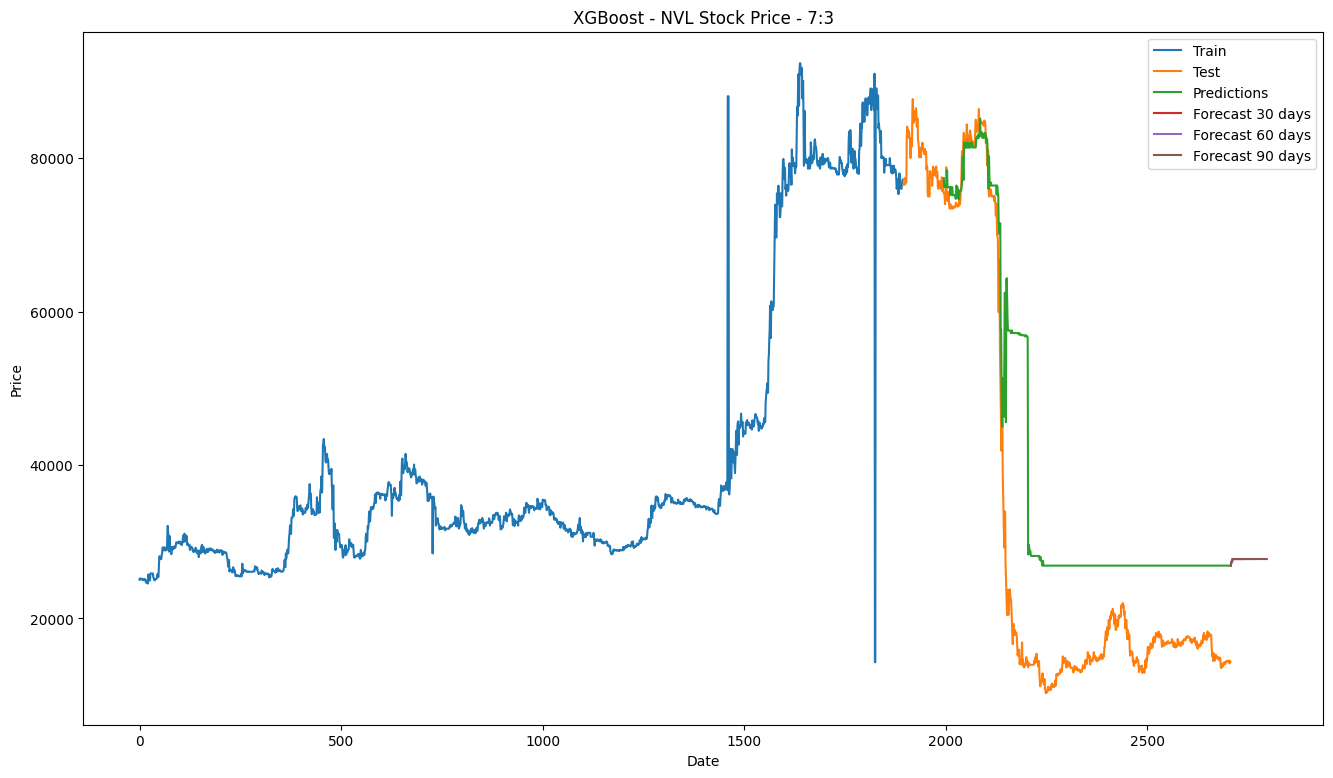

In [16]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('XGBoost - NVL Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [17]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 14976.341778582953
MAE: 11744.99875918042
MAPE: 0.7440914897939519


## 8:2 ratio

In [18]:
model_8_2 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [19]:
model_8_2.fit(x_train_8_2, y_train_8_2, eval_set=[(x_test_8_2, y_test_8_2)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

array([0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178449,
       0.19178449, 0.19178449, 0.19178449, 0.19178449, 0.19178

In [21]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 30)
#Predict 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 60)
#Predict 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, time_step, 90)

0 day output [0.19178449]
1 day output [0.19406405]
2 day output [0.19499837]
3 day output [0.19519676]
4 day output [0.19519676]
5 day output [0.19519676]
6 day output [0.19519676]
7 day output [0.19519676]
8 day output [0.19519676]
9 day output [0.19519676]
10 day output [0.19549638]
11 day output [0.1962103]
12 day output [0.19631742]
13 day output [0.19631742]
14 day output [0.19631742]
15 day output [0.19631742]
16 day output [0.19631742]
17 day output [0.19631742]
18 day output [0.19631742]
19 day output [0.19631742]
20 day output [0.19631742]
21 day output [0.19631742]
22 day output [0.19631742]
23 day output [0.19631742]
24 day output [0.19631742]
25 day output [0.19631742]
26 day output [0.19631742]
27 day output [0.19631742]
28 day output [0.19631742]
29 day output [0.19631742]
0 day output [0.19178449]
1 day output [0.19406405]
2 day output [0.19499837]
3 day output [0.19519676]
4 day output [0.19519676]
5 day output [0.19519676]
6 day output [0.19519676]
7 day output [0.195

In [22]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],
       [25998.574],


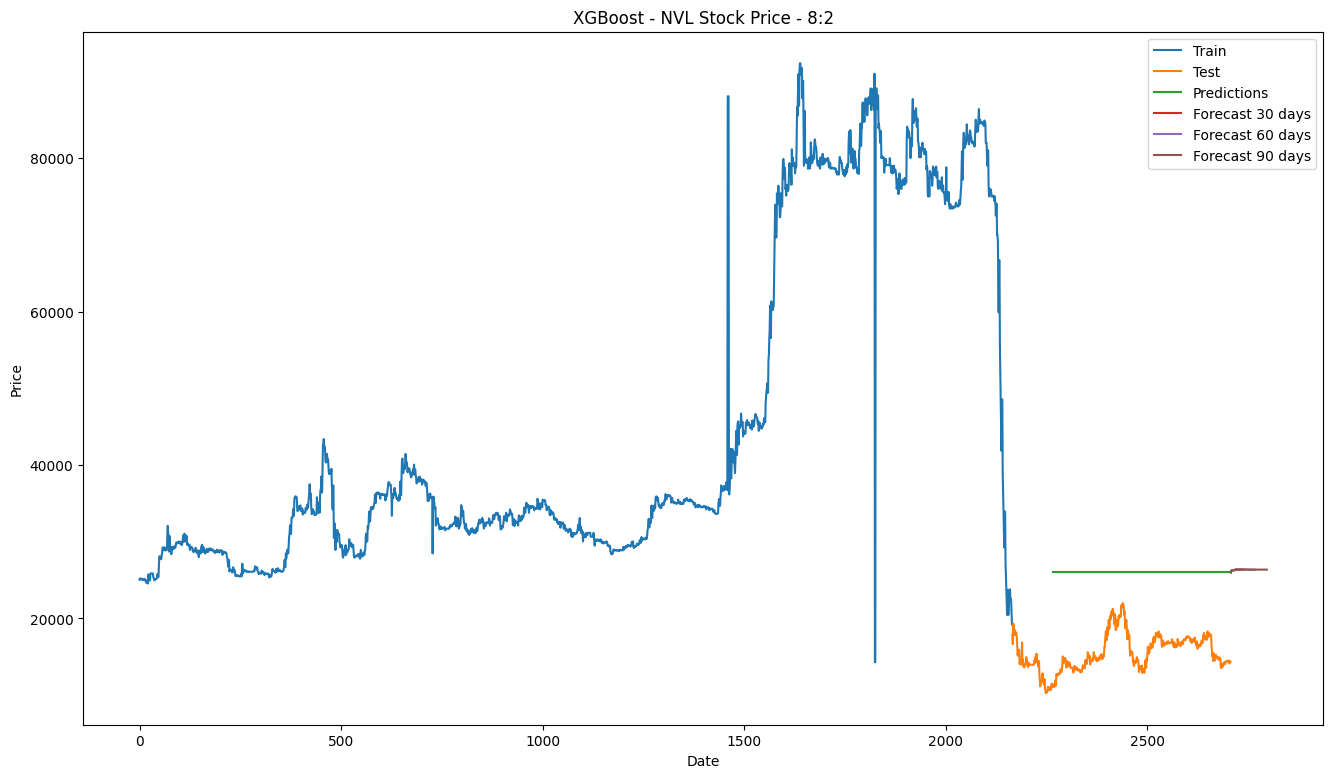

In [23]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('XGBoost - NVL Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [24]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 10325.44611534246
MAE: 10089.468020715229
MAPE: 0.665087624809892


## 9:1 ratio

In [25]:
model_9_1 = XGBRegressor(base_score=0.5,
                    booster='gbtree',
                    n_estimators=1500,
                    early_stopping_rounds=50,
                    objective='reg:squarederror',
                    max_depth=3,
                    learning_rate=0.01)

In [26]:
model_9_1.fit(x_train_9_1, y_train_9_1, eval_set=[(x_test_9_1, y_test_9_1)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

array([0.08714072, 0.07007532, 0.0832278 , 0.08714072, 0.08714072,
       0.06925463, 0.0832278 , 0.08714072, 0.07007532, 0.06534169,
       0.06616238, 0.06616238, 0.08240711, 0.08632004, 0.08632004,
       0.08632004, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.07007532, 0.0832278 , 0.08714072, 0.07007532, 0.08240711,
       0.07007532, 0.06616238, 0.06534169, 0.06616238, 0.06534169,
       0.08240711, 0.08632004, 0.08632004, 0.06925463, 0.06616238,
       0.0832278 , 0.08714072, 0.06925463, 0.06534169, 0.0832278 ,
       0.08714072, 0.08632004, 0.08632004, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714072,
       0.08714072, 0.08714072, 0.08714072, 0.08714072, 0.08714

In [28]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 30)
#Predict 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 60)
#Predict 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, time_step, 90)

0 day output [0.04984809]
1 day output [0.04902592]
2 day output [0.04902592]
3 day output [0.04984809]
4 day output [0.04902592]
5 day output [0.04902592]
6 day output [0.04902592]
7 day output [0.04902592]
8 day output [0.04902592]
9 day output [0.04902592]
10 day output [0.04902592]
11 day output [0.04902592]
12 day output [0.04902592]
13 day output [0.04902592]
14 day output [0.04902592]
15 day output [0.04902592]
16 day output [0.04902592]
17 day output [0.04902592]
18 day output [0.04902592]
19 day output [0.04902592]
20 day output [0.04902592]
21 day output [0.04902592]
22 day output [0.04902592]
23 day output [0.04902592]
24 day output [0.04902592]
25 day output [0.04902592]
26 day output [0.04902592]
27 day output [0.04902592]
28 day output [0.04902592]
29 day output [0.04902592]
0 day output [0.04984809]
1 day output [0.04902592]
2 day output [0.04902592]
3 day output [0.04984809]
4 day output [0.04902592]
5 day output [0.04902592]
6 day output [0.04902592]
7 day output [0.04

In [29]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[17405.648 ],
       [16004.305 ],
       [17084.334 ],
       [17405.648 ],
       [17405.648 ],
       [15936.912 ],
       [17084.334 ],
       [17405.648 ],
       [16004.305 ],
       [15615.598 ],
       [15682.99  ],
       [15682.99  ],
       [17016.941 ],
       [17338.256 ],
       [17338.256 ],
       [17338.256 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [17405.648 ],
       [16004.305 ],
       [17084.334 ],
       [17405.648 ],
       [16004.305 ],
       [17016.941 ],
       [16004.305 ],
       [15682.99  ],
       [15615.598 ],
       [15682.99  ],
       [15615.598 ],
       [17016.941 ],
       [17338.256 ],
       [17338.256 ],
       [15936.912 ],
       [15682.99  ],
       [17084.334 ],
       [17405.648 ],
       [15936

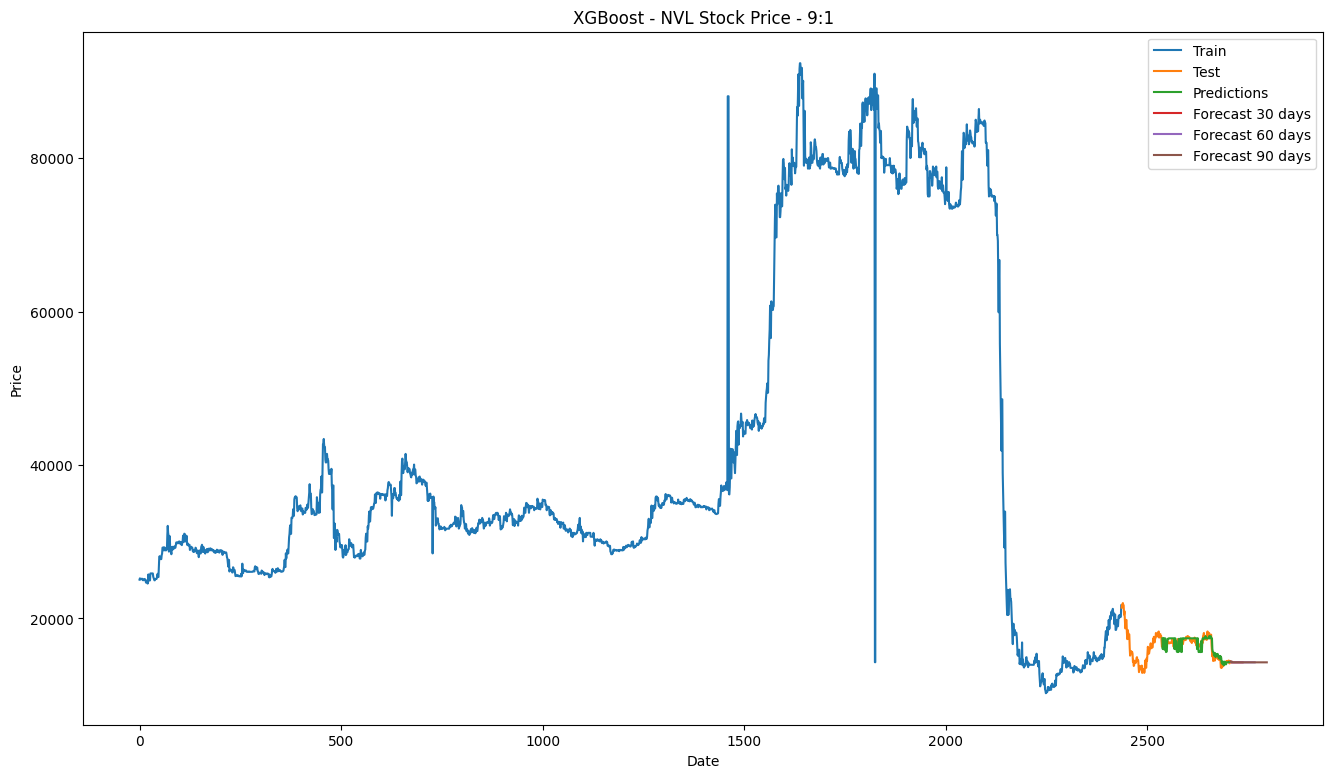

In [30]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('XGBoost - NVL Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [31]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 561.3286525558077
MAE: 443.73707873774515
MAPE: 0.027126124934602452
